In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
file_path = 'WineQT_cleaned.csv'
df = pd.read_csv(file_path)
features = df.drop(columns=['quality', 'Id'])
target = df['quality']
print("Original Data:")
print(df.head())

Original Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5

# Task 2

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.2 , random_state=42)


# Task 1&3


In [12]:
def train_and_evaluate(X_train, X_test, y_train, y_test, scaler_name):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

results = {}

In [13]:
#1.Min-Max scaling
min_max_scaler = MinMaxScaler()
X_train_min_max = min_max_scaler.fit_transform(X_train)
X_test_min_max = min_max_scaler.fit_transform(X_test)
mse, r2 = train_and_evaluate(X_train_min_max, X_test_min_max, y_train, y_test, scaler_name='MinMaxScaler')
results['MinMaxScaler'] = {'MSE': mse, 'R2': r2}

#2.standard-scaling (Z-score)
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.fit_transform(X_test)
mse, r2 = train_and_evaluate(X_train_std,X_test_std,y_train,y_test, scaler_name='StandardScaler')
results['StandardScaler'] = {'MSE': mse, 'R2': r2}

#3.Robust scaling 
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.fit_transform(X_test)
mse, r2 = train_and_evaluate(X_train_robust, X_test_robust, y_train,y_test, scaler_name='RobustScaler')
results['RobustScaler'] = {'MSE': mse, 'R2': r2}

#4. Max-Abs
max_abs_scaler = MaxAbsScaler()
X_train_max_abs = max_abs_scaler.fit_transform(X_train)
X_test_max_abs = max_abs_scaler.fit_transform(X_test)
mse, r2 =train_and_evaluate(X_train_max_abs, X_test_max_abs, y_train, y_test, scaler_name='MaxAbsScaler')
results['MaxAbsScaler'] = {'MSE': mse, 'R2': r2}

results_df = pd.DataFrame(results).T
print(results_df)

                     MSE        R2
MinMaxScaler    0.466639  0.161435
StandardScaler  0.378704  0.319457
RobustScaler    0.386263  0.305873
MaxAbsScaler    0.556842 -0.000664


# Task 4

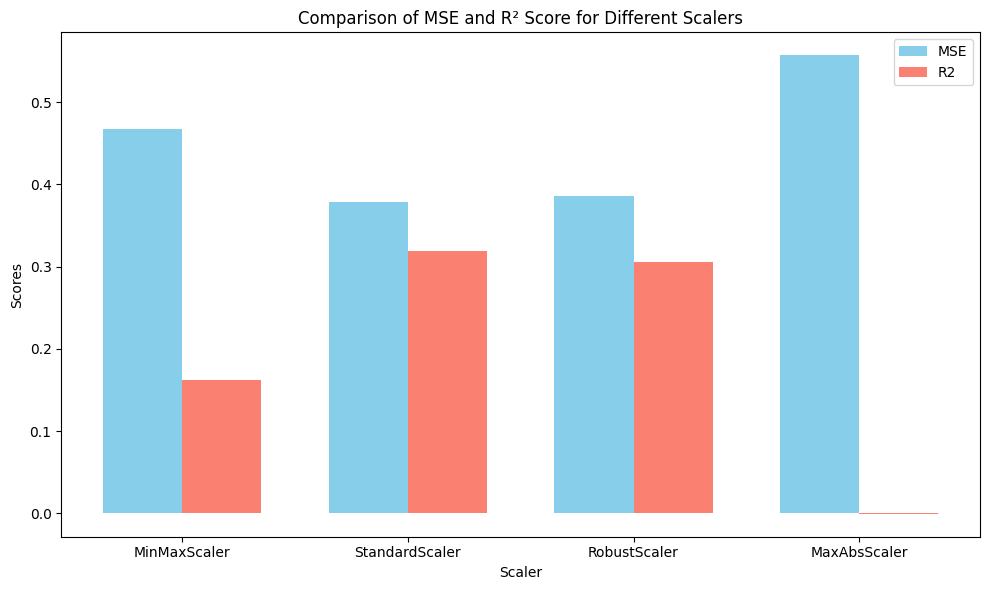

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(results))

bars1 = ax.bar(index, results_df['MSE'], bar_width, label='MSE', color='skyblue')
bars2 = ax.bar(index + bar_width, results_df['R2'], bar_width, label='R2', color='salmon')

ax.set_xlabel('Scaler')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MSE and R² Score for Different Scalers')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(results_df.index)
ax.legend()

plt.tight_layout()
plt.show()